In [ ]:
import tensorflow as tf
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
import os
import matplotlib.pyplot as plt
from google.colab import files

%matplotlib inline

In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15502, done.
remote: Total 15502 (delta 0), reused 0 (delta 0), pack-reused 15502
Receiving objects: 100% (15502/15502), 14.16 MiB | 17.62 MiB/s, done.
Resolving deltas: 100% (10405/10405), done.


In [ ]:
cd /content/darknet/data

/content/darknet/data


In [ ]:
# gdown 권한 
!pip install -U --no-cache-dir gdown --pre

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [ ]:
# best weights 다운로드 
!gdown 1-2uy497X2o8tlOoNBWljITlAAqtaxYmi

Downloading...
From: https://drive.google.com/uc?id=1-2uy497X2o8tlOoNBWljITlAAqtaxYmi
To: /content/darknet/data/yolov4-custom_best.weights
100% 256M/256M [00:03<00:00, 81.2MB/s]


In [ ]:
%cat /content/darknet/cfg/yolov4-custom.cfg

[net]
# Testing
batch=1
subdivisions=1
# Training
#batch=64
#subdivisions=32
width=608
height=608
channels=3
momentum=0.949
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1

learning_rate=0.001
burn_in=1000
max_batches = 500500
policy=steps
steps=400000,450000
scales=.1,.1

#cutmix=1
mosaic=1

#:104x104 54:52x52 85:26x26 104:13x13 for 416

[convolutional]
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=mish

# Downsample

[convolutional]
batch_normalize=1
filters=64
size=3
stride=2
pad=1
activation=mish

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=mish

[route]
layers = -2

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=mish

[convolutional]
batch_normalize=1
filters=32
size=1
stride=1
pad=1
activation=mish

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=mish

[shortcut]
from=-3
activation=linear

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
act

In [ ]:
# 파일 확인 
%cat /content/darknet/data/disposable.data

classes = 5
train = data/train.txt
valid = data/valid.txt
test = data/test.txt
names = data/ClassNames.names
backup = /content/drive/MyDrive/backup/

In [ ]:
cd /content/darknet

/content/darknet


In [ ]:
# GPU, OPENCV, LIBSO을 true로 설정
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

In [ ]:
# 위의 변경된 옵션으로 makefile을 컴파일하면 darknet.py 사용이 가능해진다.
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old ==

In [ ]:
!./darknet detector demo data/disposable.data cfg/yolov4-custom.cfg data/yolov4-custom_best.weights -dont_show -thresh 0.65 /content/alcafe.mp4 -out_filename result.avi

 CUDA-version: 11020 (11020), cuDNN: 8.1.1, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
Demo
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 co

In [ ]:
!./darknet detect data/disposable.data cfg/yolov4-custom.cfg data/yolov4-custom_best.weights /content/cafe1.jpg

 CUDA-version: 11020 (11020), cuDNN: 8.1.1, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0


In [ ]:
from darknet import *

In [ ]:
network, class_names, class_colors = load_network("cfg/yolov4-custom.cfg", "data/disposable.data", "data/yolov4-custom_best.weights")

In [ ]:
# 네트워크의 width와 height을 계산
width = network_width(network)
height = network_height(network)

print(width, height)

608 608


In [ ]:
# object detection을 수행하는 darknet_helper 함수를 살펴보자.

def darknet_helper(img, width, height):
  # 이미지를 darknet style로 전처리 -> darknet_image 변수에 저장
  darknet_image = make_image(width, height, 3)
  # input image를 BRG에서 RGB 순서로 변환
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  # input image의 size를 512x512로 변환 (network에서 받아들이는 이미지의 크기가 512x512였기 때문에)
  img_resized = cv2.resize(img_rgb, (width, height),
                              interpolation=cv2.INTER_LINEAR)

  # bounding box의 크기를 조정하기 위하여 이미지 크기 비율을 계산 
  img_height, img_width, _ = img.shape
  width_ratio = img_width/width # 원본 이미지 width/ network width
  height_ratio = img_height/height # 원본 이미지 height/ network height

  # darknet stlye로 전처리된 이미지로 모델을 작동시켜 detection을 수행
  copy_image_from_bytes(darknet_image, img_resized.tobytes())
  # detect_image 함수 실행
  detections = detect_image(network, class_names, darknet_image)
  free_image(darknet_image)

  return detections, width_ratio, height_ratio

### test

In [ ]:
# detection 결과 시각화
def show_detection():
  for label, confidence, bbox in detections:
    # center x, center y, width, height로 반환 받은 boundary box를 corner 정보 (left, top, right, bottom)로 변환
    left, top, right, bottom = bbox2points(bbox)
    # 앞서 계산한 이미지 비율을 사용하여 boundary box의 크기를 조정
    left, top, right, bottom = int(left * width_ratio), int(top * height_ratio), int(right * width_ratio), int(bottom * height_ratio)
    # boundary box 좌표에 해당하는 사각형을 이미지 위에 그림
    cv2.rectangle(imagee, (left, top), (right, bottom), class_colors[label], 2)
    # 클래스 이름과 confidence level을 사각형 위에 입력
    cv2.putText(imagee, "{} [{:.2f}]".format(label, float(confidence)),
                      (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                      class_colors[label], 2)

  # boundary box를 추가한 이미지 출력
  #RGB 이미지를 BGR로 변환
  image = cv2.cvtColor(imagee, cv2.COLOR_RGB2BGR)
  cv2_imshow(image)

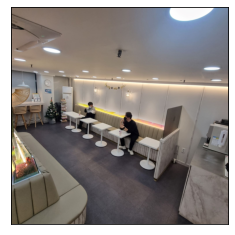

In [21]:
img = cv2.imread('/content/test10.jpg')

# percent = 1
# if(img.shape[1] > img.shape[0]) :       # 이미지의 가로가 세보다 크면 가로를 640으로 맞추고 세로를 비율에 맞춰서
#     percent = 608/img.shape[1]
# else :
#     percent = 608/img.shape[0]

# img = cv2.resize(img, dsize=(0, 0), fx=percent, fy=percent, interpolation=cv2.INTER_LINEAR)
#         # 이미지 범위 지정
# y,x,h,w = (0,0,img.shape[0], img.shape[1])

# # 그림 주변에 검은색으로 칠하기
# w_x = (608-(w-x))/2  # w_x = (224 - 그림)을 뺀 나머지 영역 크기 [ 그림나머지/2 [그림] 그림나머지/2 ]
# h_y = (608-(h-y))/2

# if(w_x < 0):         # 크기가 -면 0으로 지정.
#     w_x = 0
# elif(h_y < 0):
#     h_y = 0

# M = np.float32([[1,0,w_x], [0,1,h_y]])  #(2*3 이차원 행렬)
# img = cv2.warpAffine(img, M, (608, 608)) #이동변환  
imagee = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
# 이미지 출력
plt.imshow(imagee) 
plt.xticks([]) # x축 눈금 (빈칸으로 두어 아무것도 표기되지 않도록 함)
plt.yticks([]) # y축 눈금 (빈칸으로 두어 아무것도 표기되지 않도록 함)
plt.show() 

In [22]:
# darknet_helper 함수에 앞서 읽은 이미지와 network height, width를 입력
detections, width_ratio, height_ratio = darknet_helper(imagee, width, height)
print(detections)

[('cup_glass', '65.76', (305.3605041503906, 352.7176818847656, 10.049155235290527, 14.810674667358398))]


#### tested

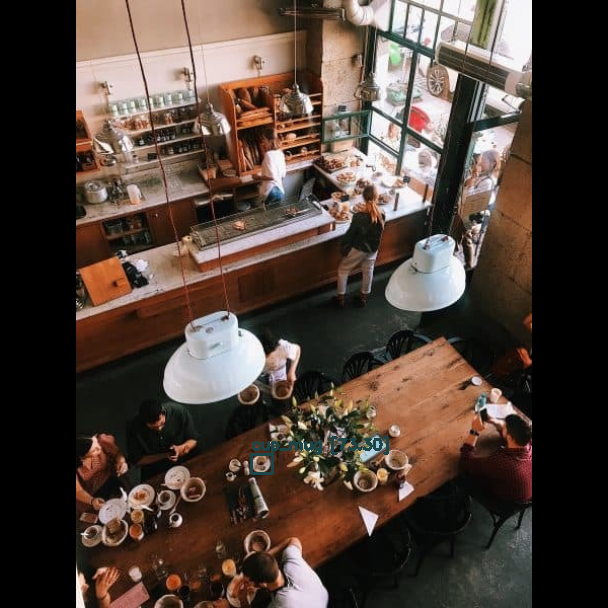

In [ ]:
# detection 결과 시각화

for label, confidence, bbox in detections:
  # center x, center y, width, height로 반환 받은 boundary box를 corner 정보 (left, top, right, bottom)로 변환
  left, top, right, bottom = bbox2points(bbox)
  # 앞서 계산한 이미지 비율을 사용하여 boundary box의 크기를 조정
  left, top, right, bottom = int(left * width_ratio), int(top * height_ratio), int(right * width_ratio), int(bottom * height_ratio)
  # boundary box 좌표에 해당하는 사각형을 이미지 위에 그림
  cv2.rectangle(imagee, (left, top), (right, bottom), class_colors[label], 2)
  # 클래스 이름과 confidence level을 사각형 위에 입력
  cv2.putText(imagee, "{} [{:.2f}]".format(label, float(confidence)),
                    (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                    class_colors[label], 2)

# boundary box를 추가한 이미지 출력
#RGB 이미지를 BGR로 변환
image = cv2.cvtColor(imagee, cv2.COLOR_RGB2BGR)
cv2_imshow(image)

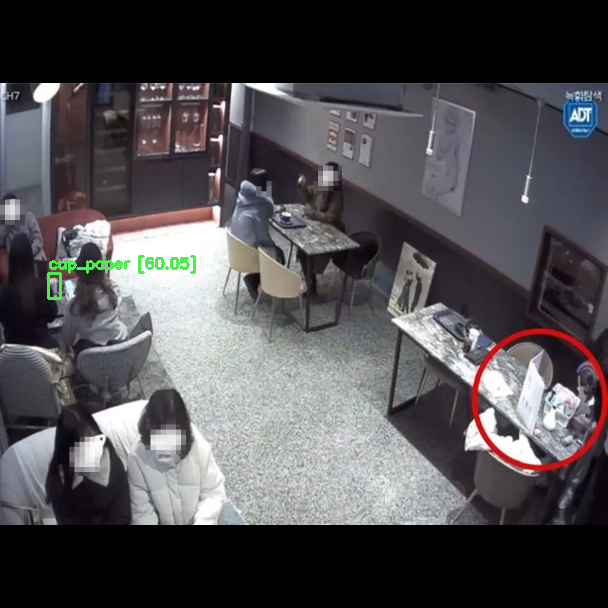

In [ ]:
# detection 결과 시각화

for label, confidence, bbox in detections:
  # center x, center y, width, height로 반환 받은 boundary box를 corner 정보 (left, top, right, bottom)로 변환
  left, top, right, bottom = bbox2points(bbox)
  # 앞서 계산한 이미지 비율을 사용하여 boundary box의 크기를 조정
  left, top, right, bottom = int(left * width_ratio), int(top * height_ratio), int(right * width_ratio), int(bottom * height_ratio)
  # boundary box 좌표에 해당하는 사각형을 이미지 위에 그림
  cv2.rectangle(imagee, (left, top), (right, bottom), class_colors[label], 2)
  # 클래스 이름과 confidence level을 사각형 위에 입력
  cv2.putText(imagee, "{} [{:.2f}]".format(label, float(confidence)),
                    (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                    class_colors[label], 2)

# boundary box를 추가한 이미지 출력
#RGB 이미지를 BGR로 변환
image = cv2.cvtColor(imagee, cv2.COLOR_RGB2BGR)
cv2_imshow(image)

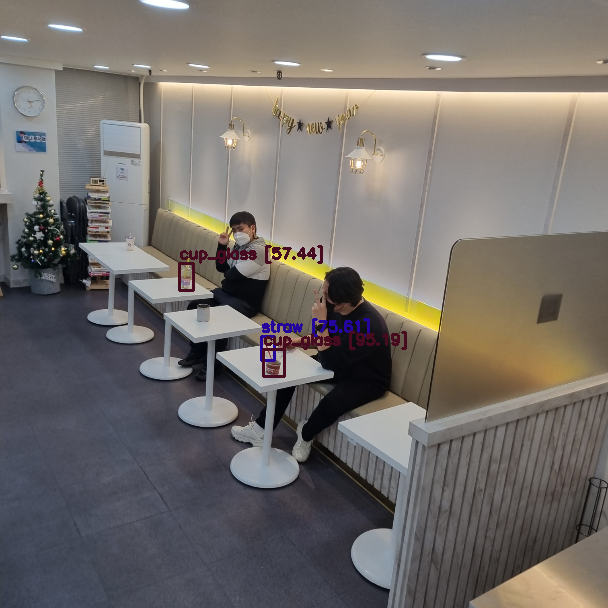

In [ ]:
show_detection()

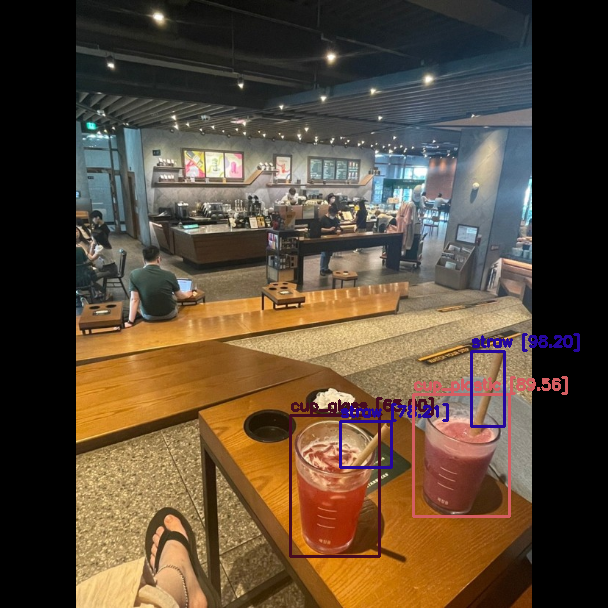

In [ ]:
show_detection()

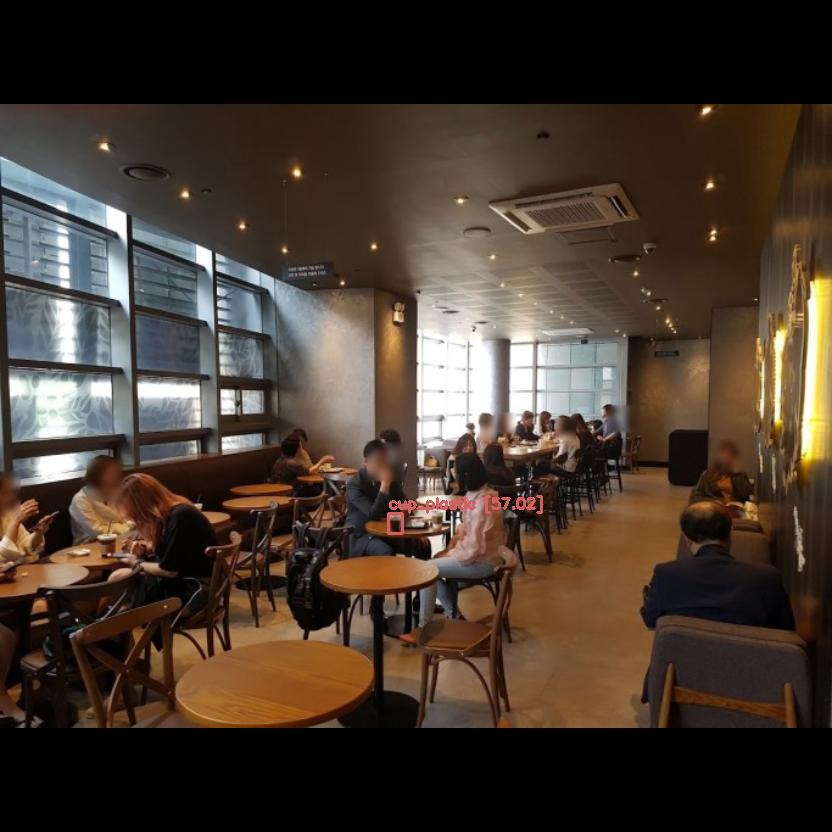

In [ ]:
show_detection()

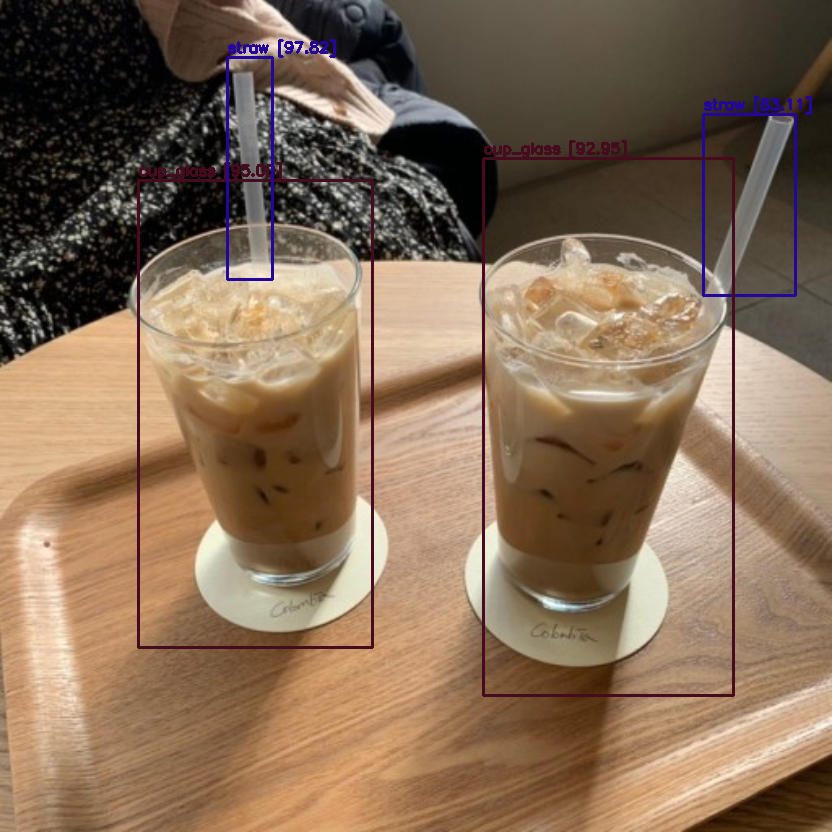

In [ ]:
show_detection()

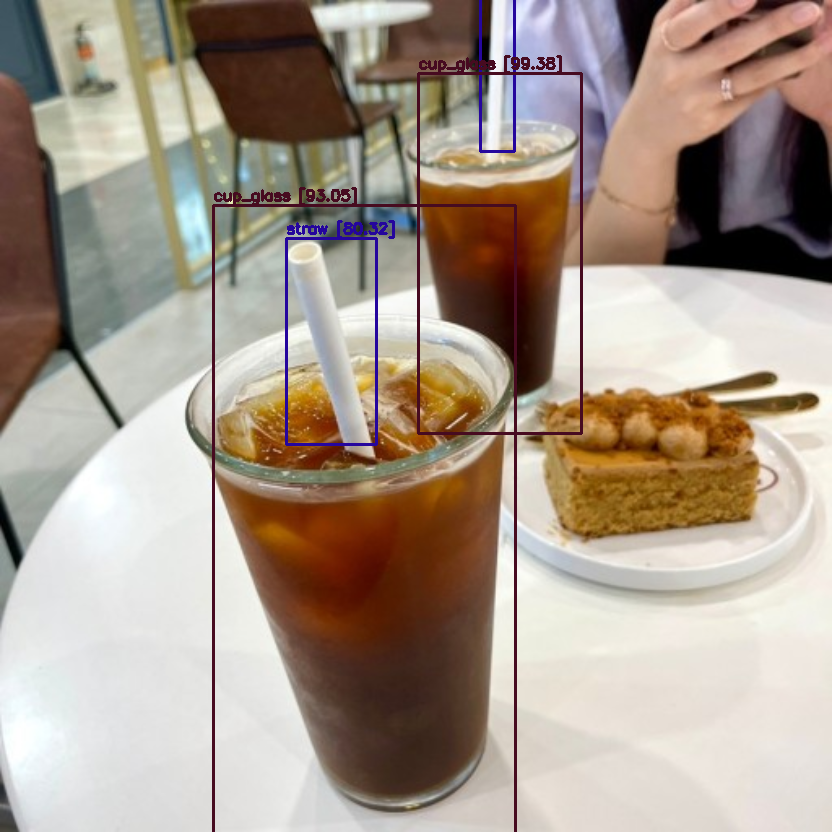

In [ ]:
show_detection()

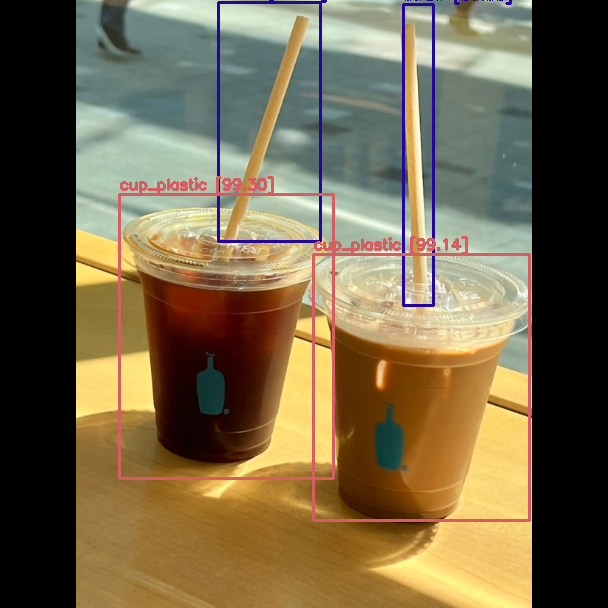

In [ ]:
show_detection()

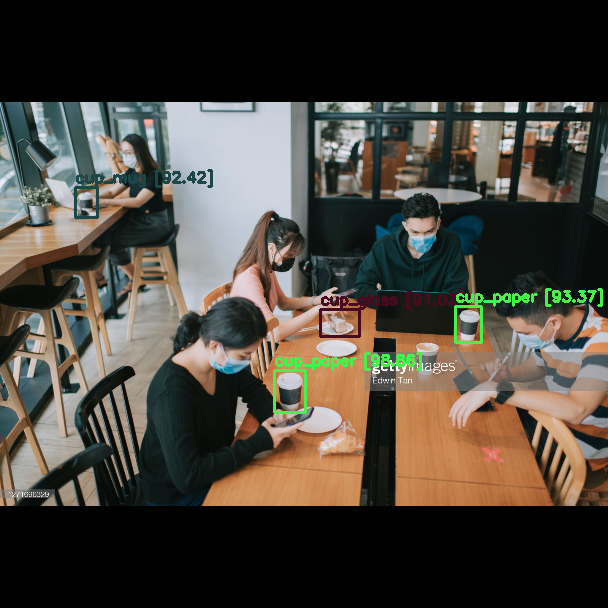

In [ ]:
show_detection()

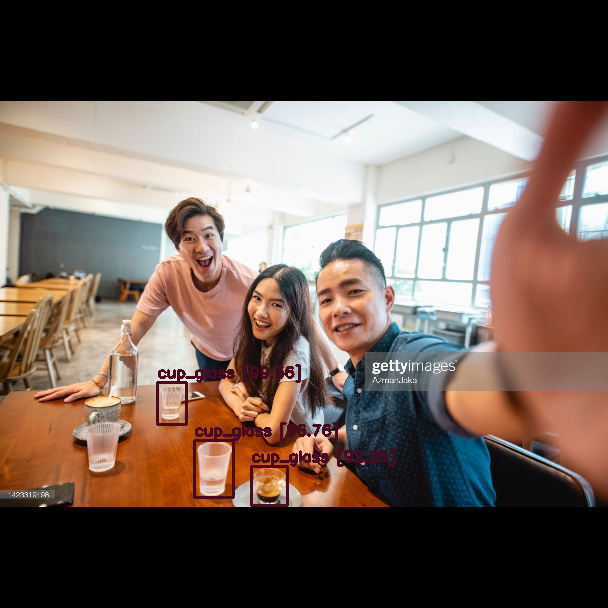

In [ ]:
show_detection()

In [ ]:
show_detection()

Output hidden; open in https://colab.research.google.com to view.

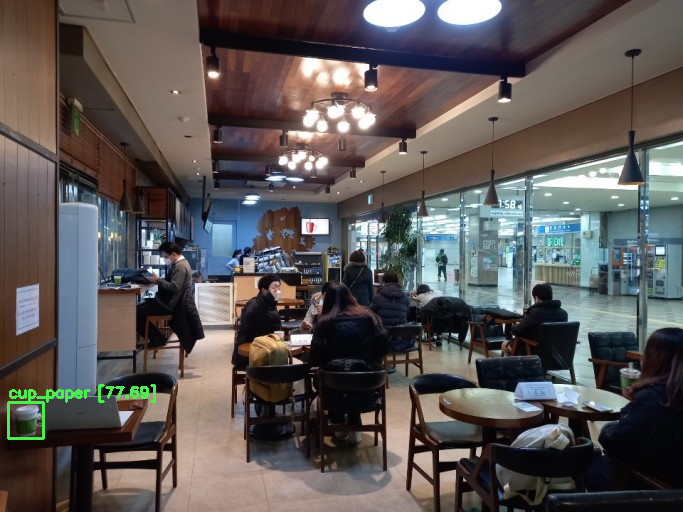

In [ ]:
show_detection()

In [ ]:
show_detection()

Output hidden; open in https://colab.research.google.com to view.

#### testing

In [ ]:
show_detection()

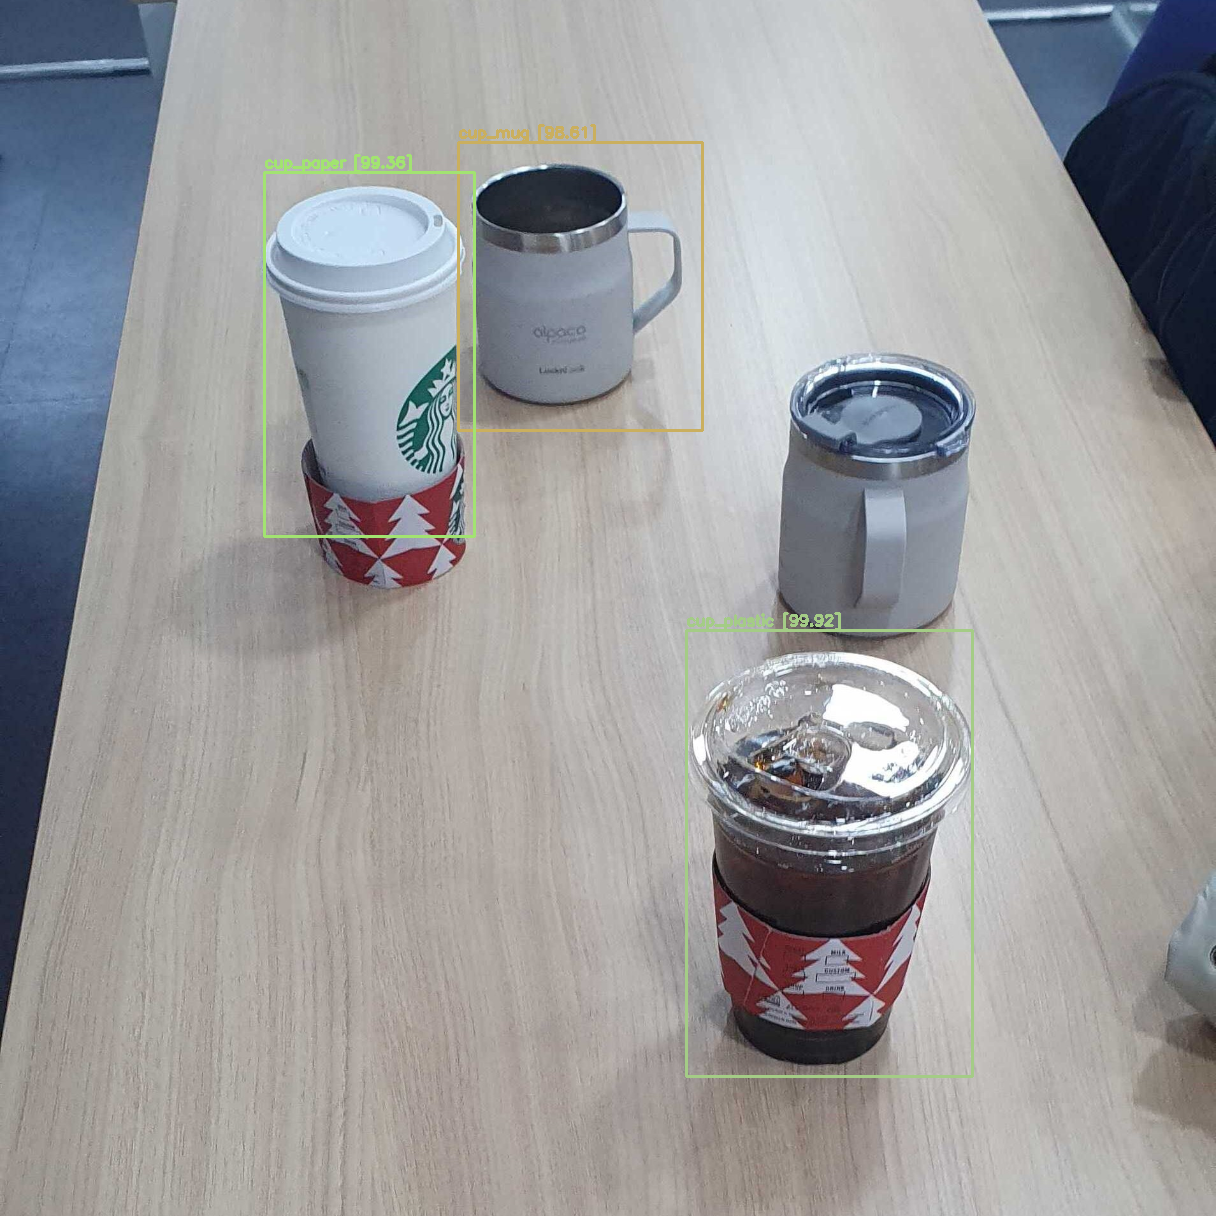

In [ ]:
show_detection()

In [ ]:
show_detection()

In [ ]:
show_detection()